In [56]:
# importing the libraries
import pandas as pd
import numpy as np
import os

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [57]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
cd  /content/drive/MyDrive/DeepLearning_FashionMnist/

/content/drive/MyDrive/DeepLearning_FashionMnist


In [59]:
!unzip test_ScVgIM0.zip

Archive:  test_ScVgIM0.zip
replace test/62791.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip train_LbELtWX.zip

In [60]:
test = pd.read_csv('/content/drive/MyDrive/DeepLearning_FashionMnist/test.csv')
train = pd.read_csv('/content/drive/MyDrive/DeepLearning_FashionMnist/train.csv')

In [61]:

test_img = []
for img_name in tqdm(test['id']):
    # defining the image path
    image_path = '/content/drive/MyDrive/DeepLearning_FashionMnist/test/' + str(img_name) + '.png'
    # reading the image
    img = imread(image_path, as_gray=True)
    # normalizing the pixel values
    img /= 255.0
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    test_img.append(img)

# converting the list to numpy array
test_x = np.array(test_img)
# defining the target
#test_y = test['label'].values
test_x.shape


100%|██████████| 10000/10000 [00:22<00:00, 451.71it/s]


(10000, 28, 28)

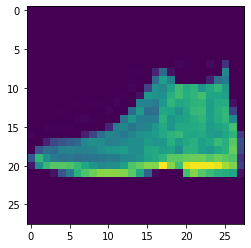

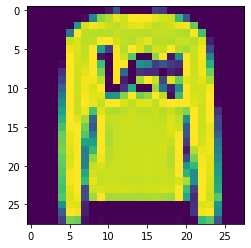

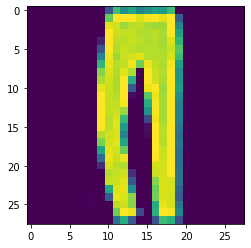

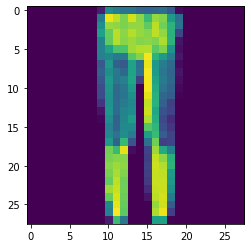

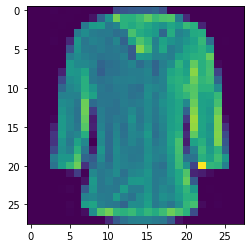

In [62]:
for i in range(0,5):
    plt.imshow(test_x[i])
    plt.show()

In [63]:
train_img = []
for img_name in tqdm(train['id']):
    # defining the image path
    image_path = '/content/drive/MyDrive/DeepLearning_FashionMnist/train/' + str(img_name) + '.png'
    # reading the image
    img = imread(image_path, as_gray=True)
    # normalizing the pixel values
    img /= 255.0
    # converting the type of pixel to float 32
    img = img.astype('float32')
    # appending the image into the list
    train_img.append(img)

# converting the list to numpy array
train_x = np.array(train_img)
# defining the target
train_y = train['label'].values
train_x.shape

100%|██████████| 60000/60000 [02:20<00:00, 425.66it/s]


(60000, 28, 28)

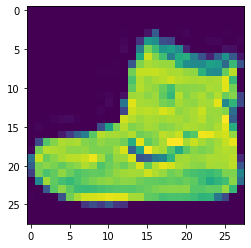

Actual Target :  9


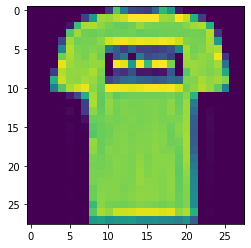

Actual Target :  0


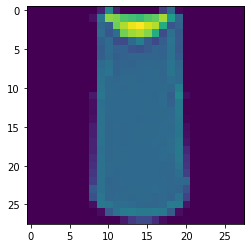

Actual Target :  0


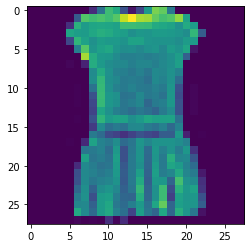

Actual Target :  3


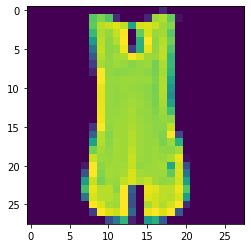

Actual Target :  0


In [64]:
for i in range(0,5):
    plt.imshow(train_x[i])
    plt.show()
    print("Actual Target : ",train_y[i])

In [65]:
train_x = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[1],test_x.shape[2],1)

In [66]:
from keras.utils.np_utils import to_categorical

In [67]:
train_y = to_categorical(train_y)

In [68]:
train_x.shape, test_x.shape, train_y.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000, 10))

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras import optimizers, losses
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten

In [85]:
model1 = Sequential()

In [86]:
model1.add(Conv2D(input_shape = (28,28,1), filters=20, kernel_size=(2,2), strides=(1,1) ))

In [87]:
model1.add(Activation('relu'))

In [88]:
model1.add(MaxPooling2D(pool_size=(2, 2), strides = (1,1)))

In [89]:
model1.add(Flatten())

In [90]:
model1.add(Dense(1000, activation='relu'))

In [91]:
model1.add(Dense(10, activation='softmax'))

In [92]:
adm = optimizers.Adam()

In [93]:
model1.compile(loss = "categorical_crossentropy", optimizer=adm, metrics=['accuracy'])

In [94]:
model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_92 (Conv2D)          (None, 27, 27, 20)        100       
                                                                 
 activation_49 (Activation)  (None, 27, 27, 20)        0         
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 26, 26, 20)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 13520)             0         
                                                                 
 dense_12 (Dense)            (None, 1000)              13521000  
                                                                 
 dense_13 (Dense)            (None, 10)                10010     
                                                     

In [96]:
model_history = model1.fit(train_x, train_y  , batch_size=50, validation_split=0.2, epochs=50, verbose = 1)

Epoch 1/50
960/960 [==============================] - 178s 185ms/step - loss: 0.6120 - accuracy: 0.7733 - val_loss: 0.5247 - val_accuracy: 0.8081
Epoch 2/50
960/960 [==============================] - 177s 185ms/step - loss: 0.4896 - accuracy: 0.8219 - val_loss: 0.4645 - val_accuracy: 0.8306
Epoch 3/50
960/960 [==============================] - 178s 185ms/step - loss: 0.4403 - accuracy: 0.8412 - val_loss: 0.4424 - val_accuracy: 0.8383
Epoch 4/50
960/960 [==============================] - 179s 186ms/step - loss: 0.4099 - accuracy: 0.8532 - val_loss: 0.4058 - val_accuracy: 0.8532
Epoch 5/50
960/960 [==============================] - 178s 185ms/step - loss: 0.3867 - accuracy: 0.8612 - val_loss: 0.3946 - val_accuracy: 0.8576
Epoch 6/50
960/960 [==============================] - 178s 185ms/step - loss: 0.3694 - accuracy: 0.8673 - val_loss: 0.3968 - val_accuracy: 0.8539
Epoch 7/50
960/960 [==============================] - 180s 188ms/step - loss: 0.3564 - accuracy: 0.8688 - val_loss: 0.3674 -

In [97]:
test_pred = model1.predict(test_x)


In [99]:
test_pred.shape

(10000, 10)

In [100]:
submission = pd.read_csv('/content/drive/MyDrive/DeepLearning_FashionMnist/sample_submission_I5njJSF.csv')
submission['label'] = np.argmax(model1.predict(test_x),axis=1)
submission.to_csv("submission_CNN.csv")